In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math
import string
import operator

# Figure 4 in paper

### Calculating survivorship curves for captive and wild mutant Telostylinus males and females

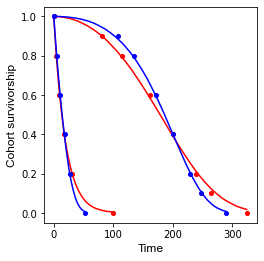

In [4]:
#Calculating survivorship curves for captive and wild mutant Telostylinus males and females
Tmax_C_F = 325
Tmax_C_M = 290
Tmax_W_F = 100
Tmax_W_M = 53

nind = 1000; 
nrepeats = 100

epsilon_F = 0.04
epsilon_M = 0.04

# The 8 parameters below are based on previous least-squares curve fitting (see paper for details)
alpha_F = 0.00287
kappa_F = 0.00842

alpha_M = 0.00057
kappa_M = 0.0173

prod_mut_W_F = 0.0503    # =(1-epsilon_F)*h_mut_F
prod_mut_W_M = 0.0435     # = (1-epsilon_M)*h_mut_M

delta = 0.0001
e = 1.8 


# Cohort survivorship protected environment females
mut_C_F = np.zeros((nrepeats,Tmax_C_F),dtype = int)
for k in range(nrepeats):
    s = np.ones((Tmax_C_F,nind),dtype = int); 
    for j in range(1,Tmax_C_F):
        for i in range(nind):
            ran = np.random.rand(1)
            if s[j-1,i] == 1:
                if ran < alpha_F*(((1+kappa_F)**(j+1))-1):
                    s[j,i] = 0
            if s[j-1,i] == 0:
                s[j,i] = 0
    mut_C_F[k,:] = np.sum(s, axis = 1)

mean_mut_C_F = np.mean(mut_C_F,axis = 0)

# Cohort survivorship protected environment males
mut_C_M = np.zeros((nrepeats,Tmax_C_M),dtype = int)
for k in range(nrepeats):
    s = np.ones((Tmax_C_M,nind),dtype = int); 
    for j in range(1,Tmax_C_M):
        for i in range(nind):
            ran = np.random.rand(1)
            if s[j-1,i] == 1:
                if ran < alpha_M*(((1+kappa_M)**(j+1))-1):
                    s[j,i] = 0
            if s[j-1,i] == 0:
                s[j,i] = 0
    mut_C_M[k,:] = np.sum(s, axis = 1)

mean_mut_C_M = np.mean(mut_C_M,axis = 0)

# Cohort survivorship female mutant wild
mut_W_F = np.zeros((nrepeats,Tmax_W_F),dtype = int)
for k in range(nrepeats):
    s = np.ones((Tmax_W_F,nind),dtype = int); 
    for j in range(1,Tmax_W_F):
        for i in range(nind):
            ran = np.random.rand(1)
            if s[j-1,i] == 1:
                if ran < prod_mut_W_F + alpha_F*(((1+kappa_F)**(j+1))-1):
                    s[j,i] = 0
            if s[j-1,i] == 0:
                s[j,i] = 0
    mut_W_F[k,:] = np.sum(s, axis = 1)

mean_mut_W_F = np.mean(mut_W_F,axis = 0)

# Cohort survivorship male mutant wild
mut_W_M = np.zeros((nrepeats,Tmax_W_M),dtype = int)
for k in range(nrepeats):
    s = np.ones((Tmax_W_M,nind),dtype = int); 
    for j in range(1,Tmax_W_M):
        for i in range(nind):
            ran = np.random.rand(1)
            if s[j-1,i] == 1:
                if ran < prod_mut_W_M + delta*j**e + alpha_M*(((1+kappa_M)**(j+1))-1):
                    s[j,i] = 0
            if s[j-1,i] == 0:
                s[j,i] = 0
    mut_W_M[k,:] = np.sum(s, axis = 1)

mean_mut_W_M = np.mean(mut_W_M,axis = 0)


# Normalize
mean_mut_C_F = mean_mut_C_F*(1/nind)
mean_mut_C_M = mean_mut_C_M*(1/nind)
mean_mut_W_F = mean_mut_W_F*(1/nind)
mean_mut_W_M = mean_mut_W_M*(1/nind)


# Plotting
fig,ax = plt.subplots(figsize=(6,6))

#Plotting captive females
# Females captivity: extraction from Kawasaki et al 18.12.20
#plt.plot(0, 1.0,'ro')
#plt.plot(325*(37/148), 0.9,'ro')
#plt.plot(325*(52/148), 0.8,'ro')
#plt.plot(325*(73.5/148), 0.6,'ro')
#plt.plot(325*(91/148), 0.4,'ro')
#plt.plot(325*(109/148), 0.2,'ro')
#plt.plot(325*(120/148), 0.1,'ro')
#plt.plot(325*(148/148), 0.0,'ro')
 
X_C_F = [0,325*(37/148),325*(52/148),325*(73.5/148),325*(91/148),325*(109/148),325*(120/148),325*(148/148)]
Y_C_F = [1.0,0.9,0.8,0.6,0.4,0.2,0.1,0.0]
ax.plot(X_C_F,Y_C_F,'ro',markersize=4)

C1 = np.arange(0,Tmax_C_F,1,dtype = int)
ax.plot(C1,mean_mut_C_F,'r-')

#Plotting captive males
# Males captivity: extraction from Kawasaki et al 18.12.20
#plt.plot(0, 1.0,'ro')
#plt.plot(290*(49/131.5), 0.9,'ro')
#plt.plot(290*(61/131.5), 0.8,'ro')
#plt.plot(290*(78/131.5), 0.6,'ro')
#plt.plot(290*(91/131.5), 0.4,'ro')
#plt.plot(290*(104/131.5), 0.2,'ro')
#plt.plot(290*(112/131.5), 0.1,'ro')
#plt.plot(290*(131.5/131.5), 0.0,'ro')

X_C_M = [0,290*(49/131.5),290*(61/131.5),290*(78/131.5),290*(91/131.5),290*(104/131.5),290*(112/131.5),290*(131.5/131.5)]
Y_C_M = [1.0,0.9,0.8,0.6,0.4,0.2,0.1,0.0]
ax.plot(X_C_M,Y_C_M,'bo',markersize=4)

C2 = np.arange(0,Tmax_C_M,1,dtype = int)
ax.plot(C2,mean_mut_C_M,'b-')

#Plotting wild females
#Females wild: extraction from Kawasaki et al per 20 Dec 2020
#plt.plot(0, 1.0,'bo')
#plt.plot(100*2/45, 0.8,'bo')
#plt.plot(100*4/45, 0.6,'bo')
#plt.plot(100*8/45, 0.4,'bo')
#plt.plot(100*14/45, 0.2,'bo')
#plt.plot(100*45/45, 0.0,'bo')

X_W_F = [0,100*2/45,100*4/45,100*8/45,100*14/45,100*45/45]
Y_W_F = [1.0,0.8,0.6,0.4,0.2,0.0]
ax.plot(X_W_F,Y_W_F,'ro',markersize=4)

C3 = np.arange(0,Tmax_W_F,1,dtype = int)
ax.plot(C3,mean_mut_W_F,'r-')

#Plotting wild males
#Males wild: extraction from Kawasaki et al per 20 Dec 2020
#plt.plot(0, 1.0,'go')
#plt.plot(53*3/24, 0.8,'go')
#plt.plot(53*5/24, 0.6,'go')
#plt.plot(53*8.5/24, 0.4,'go')
#plt.plot(53*12/24, 0.2,'go')
#plt.plot(53*24/24, 0.0,'go') 
                                                 
X_W_M = [0,53*2.5/24,53*5/24,53*8.5/24,53*12/24,53*24/24]
Y_W_M = [1.0,0.8,0.6,0.4,0.2,0.0]
ax.plot(X_W_M,Y_W_M,'bo',markersize=4)
                                                 
C4 = np.arange(0,Tmax_W_M,1,dtype = int)
ax.plot(C4,mean_mut_W_M,'b-')

afont = {'fontname':'Arial'}
ax.set_xlabel("Time",fontsize = 12,**afont)
ax.set_ylabel("Cohort survivorship",fontsize = 12,**afont);

x_size = 10
plt.rc('xtick',labelsize=x_size)
y_size = 10
plt.rc('ytick',labelsize=y_size)

fig.tight_layout()

figure = plt.gcf()
figure.set_size_inches(3.42, 3.42)

plt.savefig('RA_PNAS_fig4_Telostylinus.pdf', dpi = 1200, bbox_inches="tight");

# Temporal differences in survivorship between mutant and hypothetical wild type - not shown in paper

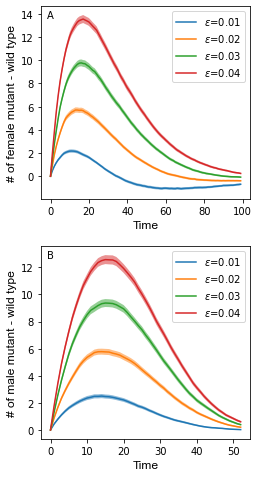

In [9]:
#Calculates the difference in number of survivors between hypothetical wild type and mutant across the time span 
# - alternative strategy where both mutant and the wildtype uses the same ran value, such that one can 
# calculate a meaningful standard deviation for this difference 
nind = 1000
nrepeats = 1000

Tmax_W_F = 100
Tmax_W_M = 53

alpha_F = 0.00287
kappa_F = 0.00842

alpha_M = 0.00057
kappa_M = 0.0173

epsilon = np.array([0.01, 0.02, 0.03, 0.04])
p_wt_F = np.array([0.0508,0.0513,0.05185,0.05239])
p_wt_M = np.array([0.04393,0.044387,0.044845,0.04531])

delta = 0.0001 
e = 1.8 

    
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(6,6))

# Females
Tmax = Tmax_W_F
p_wt = p_wt_F 
diff_mutwt = np.zeros((nrepeats,Tmax))
C = np.arange(0,Tmax,1,dtype = int)
for m in range(4):
    mut_W = np.zeros((nrepeats,Tmax),dtype = int)
    hypwt_W = np.zeros((nrepeats,Tmax),dtype = int)
    for k in range(nrepeats):
        s1 = np.ones((Tmax,nind),dtype = int)
        s2 = np.ones((Tmax,nind),dtype = int); 
        for j in range(1,Tmax):
            for i in range(nind):
                ran = np.random.rand(1)
                if s1[j-1,i] == 1:
                    if ran < (1-epsilon[m])*p_wt[m] + alpha_F*(((1+kappa_F)**(j+1))-1):
                        s1[j,i] = 0
                if s1[j-1,i] == 0:
                    s1[j,i] = 0
                
                if s2[j-1,i] == 1:
                    if ran < p_wt[m]:
                        s2[j,i] = 0
                if s2[j-1,i] == 0:
                    s2[j,i] = 0
        
        mut_W[k,:] = np.sum(s1, axis = 1)
    
        hypwt_W[k,:] = np.sum(s2, axis = 1)
    
        diff_mutwt[k,:] = mut_W[k,:] - hypwt_W[k,:]
                
    
    #Calculate the difference in number of survivors between wild type and mutant across the time span
    mean_diff = np.mean(diff_mutwt,axis = 0)
    std_diff = np.std(diff_mutwt,axis =0 )
    
    if m==0:
        l1, = ax1.plot(C,mean_diff)
        ax1.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats), mean_diff+3.0*std_diff/np.sqrt(nrepeats), alpha = 0.5)
    if m==1:
        l2, = ax1.plot(C,mean_diff)
        ax1.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats), mean_diff+3.0*std_diff/np.sqrt(nrepeats), alpha = 0.5)
    if m==2:
        l3, = ax1.plot(C,mean_diff)
        ax1.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats), mean_diff+3.0*std_diff/np.sqrt(nrepeats), alpha = 0.5)
    if m==3:
        l4, = ax1.plot(C,mean_diff)
        ax1.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats), mean_diff+3.0*std_diff/np.sqrt(nrepeats), alpha = 0.5)

ax1.legend((l1,l2,l3,l4),('$\epsilon$=0.01', '$\epsilon$=0.02', '$\epsilon$=0.03','$\epsilon$=0.04'));
afont = {'fontname':'Arial'}
ax1.set_xlabel("Time",fontsize = 12,**afont);
ax1.set_ylabel("# of female mutant - wild type",fontsize = 12,**afont);


# Males
Tmax = Tmax_W_M
p_wt = p_wt_M 
diff_mutwt = np.zeros((nrepeats,Tmax))
C = np.arange(0,Tmax,1,dtype = int)
for m in range(4):
    mut_W = np.zeros((nrepeats,Tmax),dtype = int)
    hypwt_W = np.zeros((nrepeats,Tmax),dtype = int)
    for k in range(nrepeats):
        s1 = np.ones((Tmax,nind),dtype = int)
        s2 = np.ones((Tmax,nind),dtype = int); 
        for j in range(1,Tmax):
            for i in range(nind):
                ran = np.random.rand(1)
                if s1[j-1,i] == 1:
                    if ran < (1-epsilon[m])*p_wt[m] + delta*j**e + alpha_M*(((1+kappa_M)**(j+1))-1):
                        s1[j,i] = 0
                if s1[j-1,i] == 0:
                    s1[j,i] = 0
                
                if s2[j-1,i] == 1:
                    if ran < p_wt[m] + delta*j**e:
                        s2[j,i] = 0
                if s2[j-1,i] == 0:
                    s2[j,i] = 0
        
        mut_W[k,:] = np.sum(s1, axis = 1)
    
        hypwt_W[k,:] = np.sum(s2, axis = 1)
        
        diff_mutwt[k,:] = mut_W[k,:] - hypwt_W[k,:]
                
    
    #Calculate the difference in number of survivors between wild type and mutant across the time span
    mean_diff = np.mean(diff_mutwt,axis = 0)
    std_diff = np.std(diff_mutwt,axis =0 )
    
    if m==0:
        l1, = ax2.plot(C,mean_diff)
        ax2.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats), mean_diff+3.0*std_diff/np.sqrt(nrepeats), alpha = 0.5)
    if m==1:
        l2, = ax2.plot(C,mean_diff)
        ax2.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats), mean_diff+3.0*std_diff/np.sqrt(nrepeats), alpha = 0.5)
    if m==2:
        l3, = ax2.plot(C,mean_diff)
        ax2.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats), mean_diff+3.0*std_diff/np.sqrt(nrepeats), alpha = 0.5)
    if m==3:
        l4, = ax2.plot(C,mean_diff)
        ax2.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats), mean_diff+3.0*std_diff/np.sqrt(nrepeats), alpha = 0.5)

ax2.legend((l1,l2,l3,l4),('$\epsilon$=0.01', '$\epsilon$=0.02', '$\epsilon$=0.03','$\epsilon$=0.04'));
afont = {'fontname':'Arial'}
ax2.set_xlabel("Time",fontsize = 12,**afont);
ax2.set_ylabel("# of male mutant - wild type",fontsize = 12,**afont);


x_size = 10
plt.rc('xtick',labelsize=x_size)
y_size = 10
plt.rc('ytick',labelsize=y_size)


ax1.annotate("A", xy=(0.03, 0.94), xycoords="axes fraction")
ax2.annotate("B", xy=(0.03, 0.94), xycoords="axes fraction")

fig.tight_layout()

figure = plt.gcf()
figure.set_size_inches(3.42, 6.84)
plt.savefig('RA_fig2_Telostylinus.pdf', dpi = 600, bbox_inches="tight");

# Calculates areas under survivorship curves for mutant and hypothetical wild type

### Results reported in the paper

In [10]:
#Calculates the difference in number of survivors between female and male wild type and mutant across the time span 
# by integrating the areas under the survivirship curves where both mutant and the wildtype 

from numpy import trapz

nind = 1000
nrepeats = 1000

Tmax_W_F = 100
Tmax_W_M = 53

alpha_F = 0.00287
kappa_F = 0.00842

alpha_M = 0.00057
kappa_M = 0.0173

epsilon = np.array([0, 0.01, 0.02, 0.03, 0.04])
p_wt_F = np.array([0.0503,0.0508,0.0513,0.05185,0.05239])
p_wt_M = np.array([0.0435,0.04393,0.044387,0.044845,0.04531])

for z in range(2):
    if z == 0:
        p_wt = p_wt_F
        alpha = alpha_F
        kappa = kappa_F
        Tmax = Tmax_W_F
        delta = 0
        e = 0
    if z == 1:
        p_wt = p_wt_M
        alpha = alpha_M
        kappa = kappa_M
        Tmax = Tmax_W_M
        delta = 0.0001
        e = 1.8
    area_mut = np.zeros((5,nrepeats))
    area_wt = np.zeros((5,nrepeats))
    for m in range(5):

        mut_W = np.zeros((nrepeats,Tmax),dtype = int)
        hypwt_W = np.zeros((nrepeats,Tmax),dtype = int)

        for k in range(nrepeats):
            s1 = np.ones((Tmax,nind),dtype = int)
            s2 = np.ones((Tmax,nind),dtype = int); 
            for j in range(1,Tmax):
                for i in range(nind):
                    ran = np.random.rand(1)
                    if s1[j-1,i] == 1:
                        if ran < (1-epsilon[m])*p_wt[m] + delta*j**e + alpha*(((1+kappa)**(j+1))-1):
                            s1[j,i] = 0
                    if s1[j-1,i] == 0:
                        s1[j,i] = 0

                    if s2[j-1,i] == 1:
                        if ran < p_wt[m]+delta*j**e:
                            s2[j,i] = 0
                    if s2[j-1,i] == 0:
                        s2[j,i] = 0

            mut_W[k,:] = np.sum(s1, axis = 1)
            y = mut_W[k,:]
            area_mut[m,k] = trapz(y, dx=1)

            hypwt_W[k,:] = np.sum(s2, axis = 1)
            y = hypwt_W[k,:]
            area_wt[m,k] = trapz(y, dx=1)

    #Calculate the percentage of cases where the mutant has a larger area than the stipulated wild type
    Z = np.subtract(area_mut,area_wt)
    Y = Z.transpose()
    G = np.count_nonzero(Y>0,axis=0)
    R = G*100/nrepeats
    if z == 0:
        print('Percentage female mutant wins: ',R)
        print('Number of female mutant winning instances:', np.count_nonzero(Y>0,axis=0))
        print()
    if z == 1:
        print('Percentage male mutant wins: ',R)
        print('Number of male mutant winning instances:', np.count_nonzero(Y>0,axis=0))

Percentage female mutant wins:  [  0.   42.   99.3 100.  100. ]
Number of female mutant winning instances: [   0  420  993 1000 1000]

Percentage male mutant wins:  [  0.   98.4 100.  100.  100. ]
Number of male mutant winning instances: [   0  984 1000 1000 1000]
